In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

lung_cancer = pd.read_csv("survey lung cancer.csv")
lung_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
print(lung_cancer.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
lung_cancer["GENDER"] = le.fit_transform(lung_cancer["GENDER"])
lung_cancer["LUNG_CANCER"] = le.fit_transform(lung_cancer["LUNG_CANCER"])
print(lung_cancer[["GENDER", "LUNG_CANCER"]].head())

   GENDER  LUNG_CANCER
0       1            1
1       1            1
2       0            0
3       1            0
4       0            0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

X = lung_cancer.drop("LUNG_CANCER", axis=1)
y = lung_cancer["LUNG_CANCER"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
rnd_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_leaf=6,
    min_samples_split=4,
    verbose=2,
    random_state=42,
    class_weight="balanced"
)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print(y_pred[0:5])

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.9032258064516129
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.88      0.70         8
           1       0.98      0.91      0.94        54

    accuracy                           0.90        62
   macro avg       0.78      0.89      0.82        62
weighted avg       0.93      0.90      0.91        62



In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Precision: 0.98
Recall: 0.9074074074074074
F1 Score: 0.9423076923076923


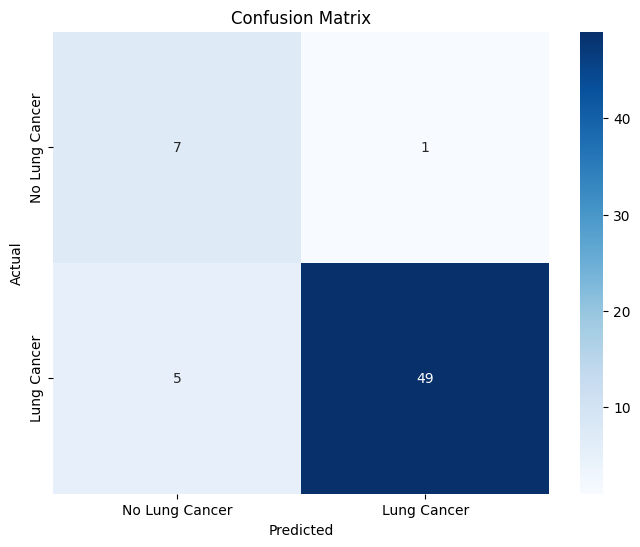

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Lung Cancer', 'Lung Cancer'],
            yticklabels=['No Lung Cancer', 'Lung Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Feature Importances:
                  Feature  Importance
0                ALLERGY     0.158123
1       ALCOHOL CONSUMING    0.132065
2           PEER_PRESSURE    0.098999
3                WHEEZING    0.080631
4   SWALLOWING DIFFICULTY    0.076898
5                COUGHING    0.067708
6                     AGE    0.064041
7                FATIGUE     0.062733
8          YELLOW_FINGERS    0.053911
9         CHRONIC DISEASE    0.051888
10             CHEST PAIN    0.043593
11                ANXIETY    0.032293
12    SHORTNESS OF BREATH    0.028728
13                SMOKING    0.024396
14                 GENDER    0.023993


<ipython-input-10-1a2bb433270d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')


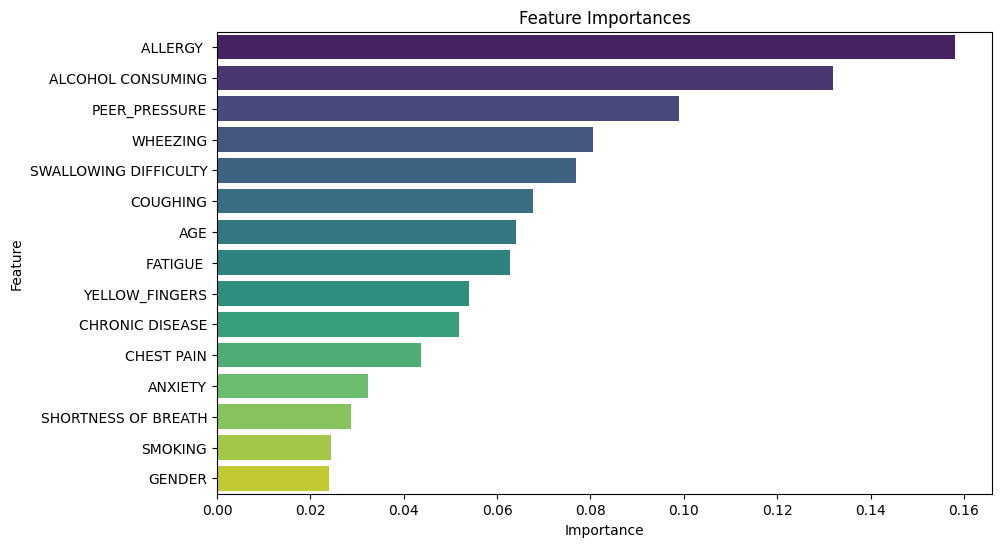

In [ ]:
feature_importances = rnd_clf.feature_importances_

features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features_df = features_df.sort_values('Importance', ascending=False).reset_index(drop=True)

print("\nFeature Importances:")
print(features_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


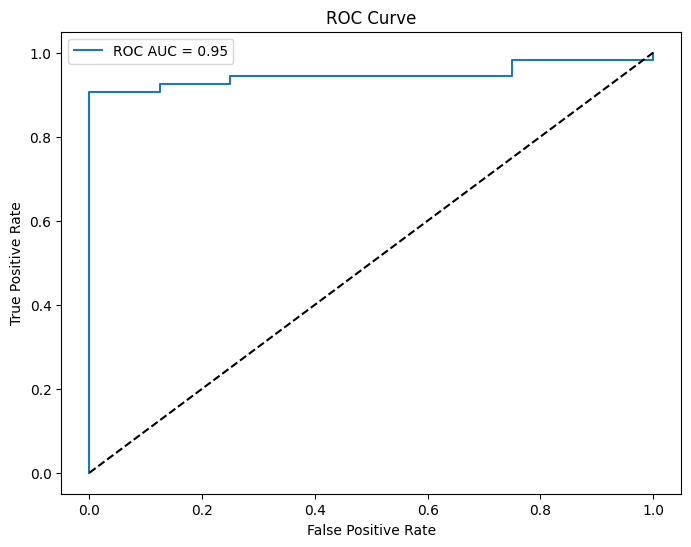

In [ ]:
y_pred_proba = rnd_clf.predict_proba(X_test)[:, 1]

test_roc_auc = roc_auc_score(y_test, y_pred_proba)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {test_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

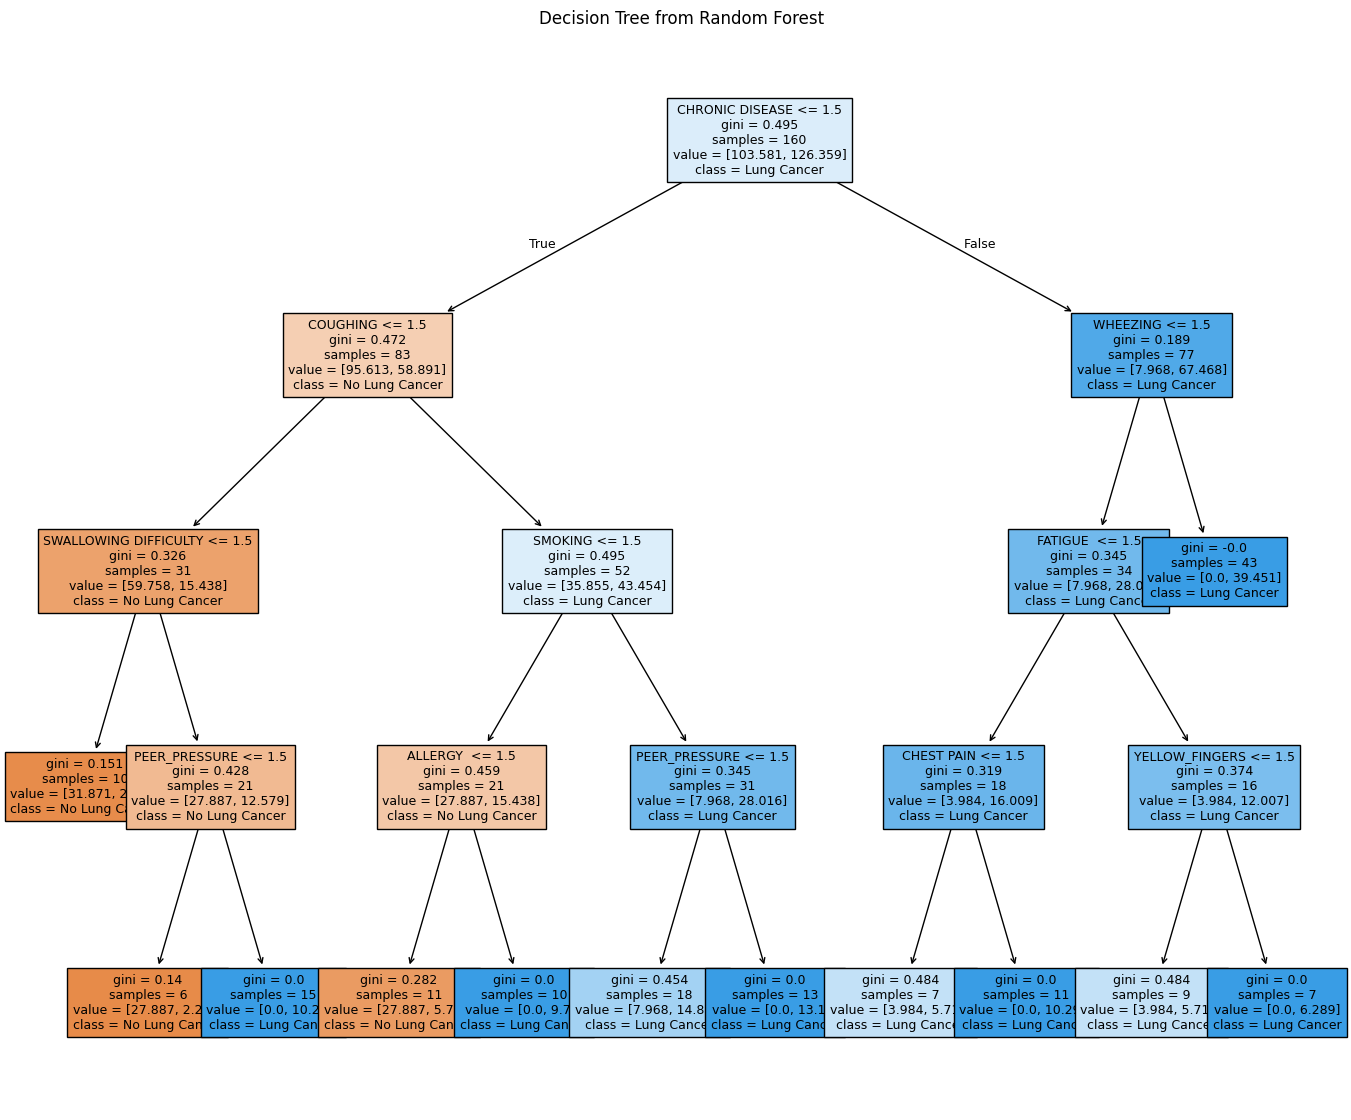

In [ ]:
plt.figure(figsize=(17, 14))
single_tree = rnd_clf.estimators_[0]
plot_tree(single_tree, feature_names=X_train.columns, class_names=['No Lung Cancer', 'Lung Cancer'], filled=True, fontsize=9)
plt.title('Decision Tree from Random Forest')
plt.show()